In [36]:
import random
import time, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ga_tsp import Individual, total_distance, selection, crossover, mutation

# =========================
# Load Data
# =========================
cities = pd.read_csv("data/cities.csv")
coords = cities[['X', 'Y']].values
N = len(coords)

# Compute distance matrix
dist_matrix = np.sqrt(((coords[:, None, :] - coords[None, :, :])**2).sum(axis=2))

Gen 0: Best = 2213.00, Average = 2640.31, Worst = 3060.66
Gen 50: Best = 1879.38, Average = 2157.21, Worst = 2404.41
Gen 100: Best = 1503.80, Average = 1822.10, Worst = 2152.15
Gen 150: Best = 1182.44, Average = 1265.32, Worst = 1632.09
Gen 200: Best = 971.69, Average = 981.32, Worst = 1238.13
Gen 250: Best = 919.73, Average = 932.87, Worst = 1226.21
Gen 300: Best = 910.46, Average = 930.70, Worst = 1232.17
Gen 350: Best = 904.81, Average = 923.43, Worst = 1233.17
Gen 400: Best = 853.50, Average = 870.69, Worst = 1152.25
Gen 450: Best = 825.05, Average = 862.69, Worst = 1161.91

Best route distance found: 798.65
Best route: [16, 21, 3, 33, 22, 32, 8, 13, 29, 20, 45, 36, 5, 34, 0, 27, 12, 7, 28, 49, 2, 18, 41, 39, 30, 42, 11, 23, 1, 46, 47, 19, 48, 9, 24, 10, 14, 38, 15, 35, 6, 31, 44, 43, 40, 17, 25, 26, 37, 4]
Computation time: 1.33 seconds


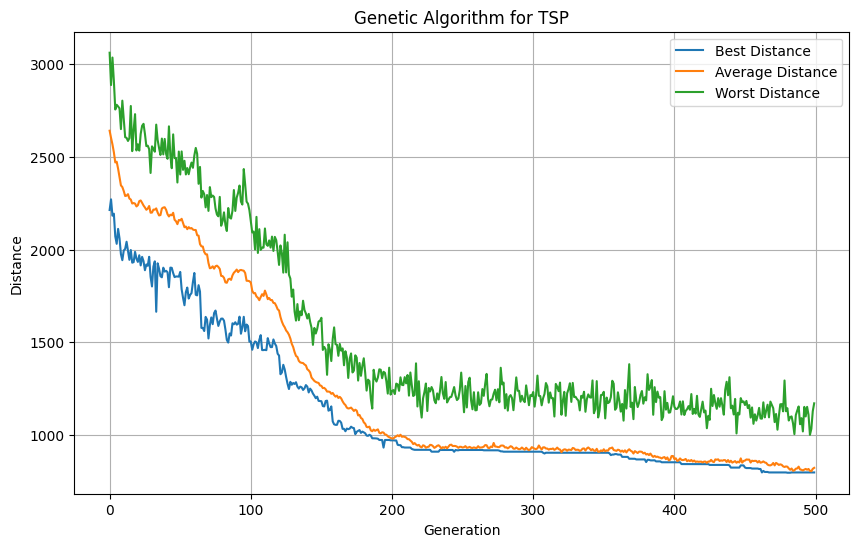

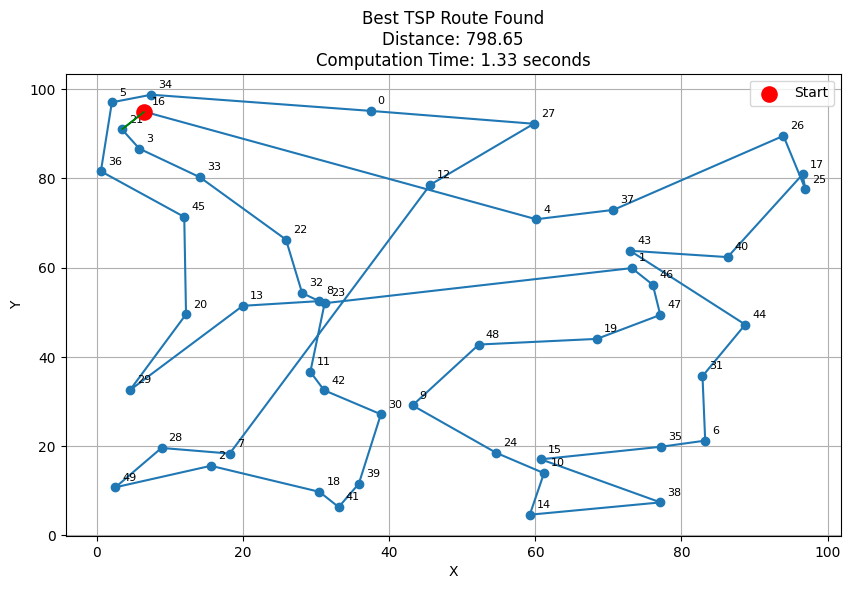

Best route saved to 'genetic_algorithm_route.txt'


In [37]:
# =========================
# GA Parameters
# =========================
P = 100           # Population size
MUTRATE = 0.1     # Mutation rate
maxGeneration = 500

# =========================
# Initialize Population
# =========================
population = []
for _ in range(P):
    gene = random.sample(range(N), N)
    ind = Individual(gene)
    ind.fitness = total_distance(ind, dist_matrix)
    population.append(ind)

# =========================
# Main Evolution Loop
# =========================
bestFitness = []
averageFitness = []
worsrtFitness = []

start_time = time.time()

for gen in range(maxGeneration):
    offspring = selection(population)
    offspring = crossover(offspring)
    offspring = mutation(offspring, MUTRATE)
    
    # Evaluate offspring
    for ind in offspring:
        ind.fitness = total_distance(ind, dist_matrix)
    
    population = offspring
    best = min(population, key=lambda x: x.fitness)
    avg = np.mean([ind.fitness for ind in population])
    worst = max(population, key=lambda x: x.fitness)
    bestFitness.append(best.fitness)
    averageFitness.append(avg)
    worsrtFitness.append(worst.fitness)
    
    if gen % 50 == 0:
        print(f"Gen {gen}: Best = {best.fitness:.2f}, Average = {avg:.2f}, Worst = {worst.fitness:.2f}")

end_time = time.time()

computation_time = end_time - start_time
# =========================
# Display Results
# =========================
best_solution = min(population, key=lambda x: x.fitness)
print(f"\nBest route distance found: {best_solution.fitness:.2f}")
print("Best route:", best_solution.gene)
print(f"Computation time: {computation_time:.2f} seconds")

# =========================
# Plot GA Statistics
# =========================
plt.figure(figsize=(10, 6))
plt.plot(bestFitness, label='Best Distance')
plt.plot(averageFitness, label='Average Distance')
plt.plot(worsrtFitness, label='Worst Distance')
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.title('Genetic Algorithm for TSP')
plt.legend()
plt.grid(True)
plt.show()


# =========================
# Plot Best Route (with City Indices + Start Direction)
# =========================
best_route = best_solution.gene + [best_solution.gene[0]]
x = [coords[i][0] for i in best_route]
y = [coords[i][1] for i in best_route]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title(f'Best TSP Route Found\nDistance: {best_solution.fitness:.2f}\nComputation Time: {computation_time:.2f} seconds')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# Annotate each city with its index
for i, city_index in enumerate(best_route[:-1]):  # exclude last duplicate
    plt.annotate(str(city_index),
                 (coords[city_index][0], coords[city_index][1]),
                 textcoords="offset points", xytext=(5, 5),
                 fontsize=8, color='black')

# Highlight the first city
first_city = best_route[0]
plt.scatter(coords[first_city][0], coords[first_city][1], color='red', s=120, zorder=5, label='Start')

# Draw an arrow from first city to second city
second_city = best_route[1]
plt.arrow(coords[first_city][0], coords[first_city][1],
          coords[second_city][0] - coords[first_city][0],
          coords[second_city][1] - coords[first_city][1],
          color='green', width=0.002, head_width=0.03, length_includes_head=True, zorder=6)

plt.legend()
plt.show()

# =========================
# Save Best Route to File
# =========================
best_route_file = "genetic_algorithm_route.txt"

with open(best_route_file, "w") as f:
    f.write(f"Best route distance: {best_solution.fitness:.2f}\n")
    f.write(f"Computation time: {computation_time:.2f} seconds\n")
    f.write("Best route (city indices in order):\n")
    f.write(" -> ".join(map(str, best_solution.gene)) + "\n")

print(f"Best route saved to '{best_route_file}'")



In [38]:
# =========================
# Hyperparameter options to test
# =========================
population_sizes = [50, 100, 200]
mutation_rates = [0.05, 0.1, 0.2]
generation_counts = [50, 100, 200, 500]

# =========================
# Hyperparameter tuning loop
# =========================
results = []

for P in population_sizes:
    for MUTRATE in mutation_rates:
        for maxGeneration in generation_counts:
            
            # Initialize population
            population = [Individual(random.sample(range(N), N)) for _ in range(P)]
            for ind in population:
                ind.fitness = total_distance(ind, dist_matrix)
            
            bestFitness = []
            
            # Start timing the run
            start_time = time.time()
            
            # GA evolution
            for gen in range(maxGeneration):
                offspring = selection(population)
                offspring = crossover(offspring)
                offspring = mutation(offspring, MUTRATE)
                
                for ind in offspring:
                    ind.fitness = total_distance(ind, dist_matrix)
                
                population = offspring
                best = min(population, key=lambda x: x.fitness)
                bestFitness.append(best.fitness)
            
            # End timing
            end_time = time.time()
            computation_time = end_time - start_time
            
            # Record final result with computation time
            results.append({
                'P': P,
                'MUTRATE': MUTRATE,
                'maxGeneration': maxGeneration,
            'best_distance': bestFitness[-1],
                'computation_time': computation_time
            })
            
            print(f"P={P}, MUTRATE={MUTRATE}, GEN={maxGeneration} -> "
                  f"Best Distance: {bestFitness[-1]:.2f}, Time: {computation_time:.2f}s")

# =========================
# Find best hyperparameter combination
# =========================
best_result = min(results, key=lambda x: x['best_distance'])
print("\nBest hyperparameters found:")
print(best_result)


P=50, MUTRATE=0.05, GEN=50 -> Best Distance: 1375.60, Time: 0.08s
P=50, MUTRATE=0.05, GEN=100 -> Best Distance: 1281.45, Time: 0.12s
P=50, MUTRATE=0.05, GEN=200 -> Best Distance: 1212.12, Time: 0.25s
P=50, MUTRATE=0.05, GEN=500 -> Best Distance: 999.59, Time: 0.68s
P=50, MUTRATE=0.1, GEN=50 -> Best Distance: 1931.06, Time: 0.06s
P=50, MUTRATE=0.1, GEN=100 -> Best Distance: 1517.30, Time: 0.12s
P=50, MUTRATE=0.1, GEN=200 -> Best Distance: 989.28, Time: 0.25s
P=50, MUTRATE=0.1, GEN=500 -> Best Distance: 882.82, Time: 0.63s
P=50, MUTRATE=0.2, GEN=50 -> Best Distance: 1701.76, Time: 0.06s
P=50, MUTRATE=0.2, GEN=100 -> Best Distance: 1384.09, Time: 0.13s
P=50, MUTRATE=0.2, GEN=200 -> Best Distance: 1077.50, Time: 0.26s
P=50, MUTRATE=0.2, GEN=500 -> Best Distance: 912.25, Time: 0.64s
P=100, MUTRATE=0.05, GEN=50 -> Best Distance: 1788.27, Time: 0.13s
P=100, MUTRATE=0.05, GEN=100 -> Best Distance: 1101.23, Time: 0.25s
P=100, MUTRATE=0.05, GEN=200 -> Best Distance: 1015.46, Time: 0.51s
P=100, M

Run 1: Best Distance = 745.04, Computation Time = 2.57 seconds
Run 2: Best Distance = 1412.49, Computation Time = 2.59 seconds
Run 3: Best Distance = 1637.07, Computation Time = 2.57 seconds
Run 4: Best Distance = 656.27, Computation Time = 2.60 seconds
Run 5: Best Distance = 796.24, Computation Time = 2.57 seconds
Run 6: Best Distance = 1717.03, Computation Time = 2.60 seconds
Run 7: Best Distance = 897.24, Computation Time = 2.57 seconds
Run 8: Best Distance = 690.45, Computation Time = 2.60 seconds
Run 9: Best Distance = 660.77, Computation Time = 2.60 seconds
Run 10: Best Distance = 1709.43, Computation Time = 2.61 seconds

Multi-run GA statistics:
Mean best distance: 1092.2035952584474
Std deviation: 442.10055340981916
Best distance overall: 656.2747924092542
Worst distance overall: 1717.0267140469025
Mean computation time per run: 2.59 seconds
Total experiment time (all 10 runs): 25.92 seconds


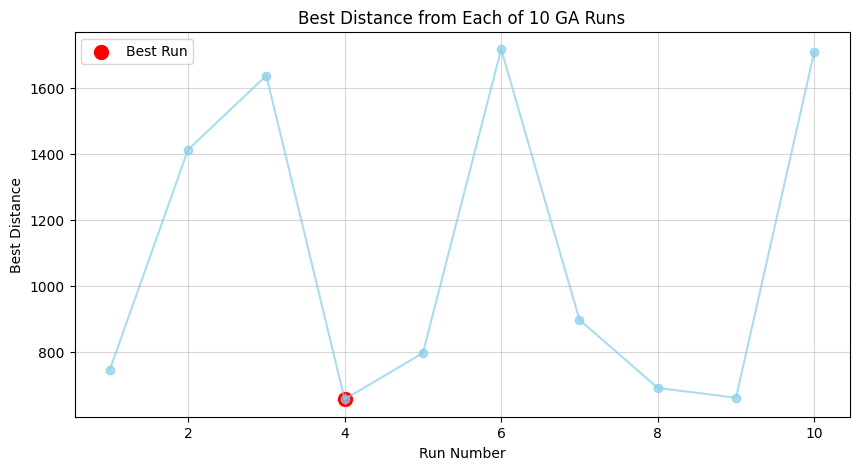

In [39]:
# =========================
# GA Parameters
# =========================
P = 200
MUTRATE = 0.1
maxGeneration = 500
num_runs = 10  # Number of independent GA runs

# =========================
# Multi-Run GA
# =========================
best_distances = []
all_bestFitness = []
run_times = []

experiment_start = time.time()
for run in range(num_runs):
    # Initialize population
    population = [Individual(random.sample(range(N), N)) for _ in range(P)]
    for ind in population:
        ind.fitness = total_distance(ind, dist_matrix)

    bestFitness = []

    start_time = time.time()
    
    for gen in range(maxGeneration):
        offspring = selection(population)
        offspring = crossover(offspring)
        offspring = mutation(offspring)
        
        for ind in offspring:
            ind.fitness = total_distance(ind, dist_matrix)
        
        population = offspring
        best = min(population, key=lambda x: x.fitness)
        bestFitness.append(best.fitness)
    
    end_time = time.time()
    computation_time = end_time - start_time
    run_times.append(computation_time)

    best_solution = min(population, key=lambda x: x.fitness)
    best_distances.append(best_solution.fitness)
    all_bestFitness.append(bestFitness)

    print(f"Run {run+1}: Best Distance = {best_solution.fitness:.2f}, Computation Time = {computation_time:.2f} seconds")
experiment_end = time.time()  # <--- End timer
experiment_time = experiment_end - experiment_start
# =========================
# Multi-Run Statistics
# =========================
print("\nMulti-run GA statistics:")
print("Mean best distance:", np.mean(best_distances))
print("Std deviation:", np.std(best_distances))
print("Best distance overall:", np.min(best_distances))
print("Worst distance overall:", np.max(best_distances))
print(f"Mean computation time per run: {np.mean(run_times):.2f} seconds")
print(f"Total experiment time (all {num_runs} runs): {experiment_time:.2f} seconds")


# =========================
# Optional: Plot convergence of all runs
# =========================
# Line chart: Best distance from each GA run
plt.figure(figsize=(10,5))
plt.plot(range(1, num_runs+1), best_distances, marker='o', linestyle='-', color='skyblue', alpha=0.7)

# Highlight the best run
best_idx = np.argmin(best_distances)
plt.scatter(best_idx+1, best_distances[best_idx], color='red', s=100, label='Best Run')

plt.xlabel("Run Number")
plt.ylabel("Best Distance")
plt.title(f"Best Distance from Each of {num_runs} GA Runs")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()



P=50, MUTRATE=0.05, GEN=50 -> Best Distance: 1569.21, Time: 0.08s
P=50, MUTRATE=0.05, GEN=100 -> Best Distance: 1319.57, Time: 0.12s
P=50, MUTRATE=0.05, GEN=200 -> Best Distance: 1253.91, Time: 0.25s
P=50, MUTRATE=0.05, GEN=500 -> Best Distance: 957.63, Time: 0.63s
P=50, MUTRATE=0.1, GEN=50 -> Best Distance: 1659.11, Time: 0.06s
P=50, MUTRATE=0.1, GEN=100 -> Best Distance: 1341.28, Time: 0.13s
P=50, MUTRATE=0.1, GEN=200 -> Best Distance: 1103.63, Time: 0.25s
P=50, MUTRATE=0.1, GEN=500 -> Best Distance: 1009.26, Time: 0.63s
P=50, MUTRATE=0.2, GEN=50 -> Best Distance: 1824.31, Time: 0.06s
P=50, MUTRATE=0.2, GEN=100 -> Best Distance: 1690.52, Time: 0.13s
P=50, MUTRATE=0.2, GEN=200 -> Best Distance: 1108.33, Time: 0.26s
P=50, MUTRATE=0.2, GEN=500 -> Best Distance: 789.84, Time: 0.64s
P=100, MUTRATE=0.05, GEN=50 -> Best Distance: 1536.15, Time: 0.13s
P=100, MUTRATE=0.05, GEN=100 -> Best Distance: 1130.59, Time: 0.25s
P=100, MUTRATE=0.05, GEN=200 -> Best Distance: 906.33, Time: 0.51s
P=100, 


City Size: 10
Mean best distance: 290.3067737918128
Std deviation: 2.5421149729252075e-14
Best distance overall: 290.3067737918128
Worst distance overall: 290.3067737918129
Mean computation time per run: 0.7944739580154419 seconds

City Size: 20
Mean best distance: 419.35185321263907
Std deviation: 33.200687203914974
Best distance overall: 386.42968948346993
Worst distance overall: 463.34510066938765
Mean computation time per run: 1.1569410800933837 seconds

City Size: 30
Mean best distance: 532.9645151490678
Std deviation: 37.98798485936215
Best distance overall: 474.69274863697484
Worst distance overall: 581.5708559172992
Mean computation time per run: 1.5504941940307617 seconds

City Size: 40
Mean best distance: 619.908613565957
Std deviation: 29.20089130765919
Best distance overall: 579.384386778878
Worst distance overall: 686.5997523127749
Mean computation time per run: 2.0554131984710695 seconds

City Size: 50
Mean best distance: 937.4303502616
Std deviation: 313.45638759500173


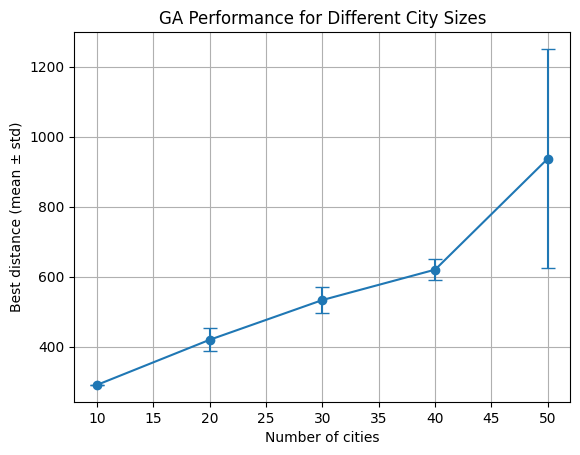

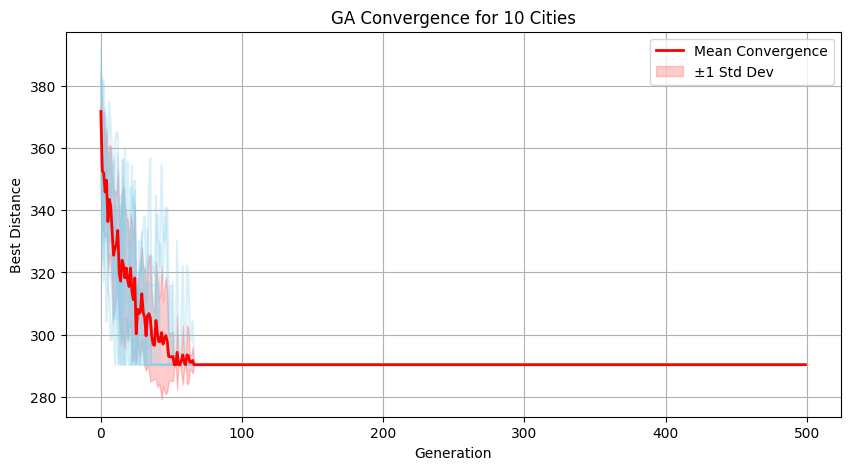

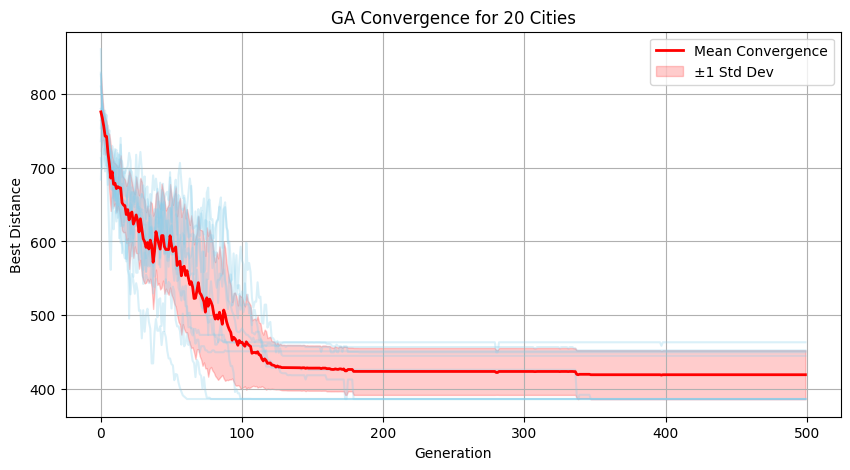

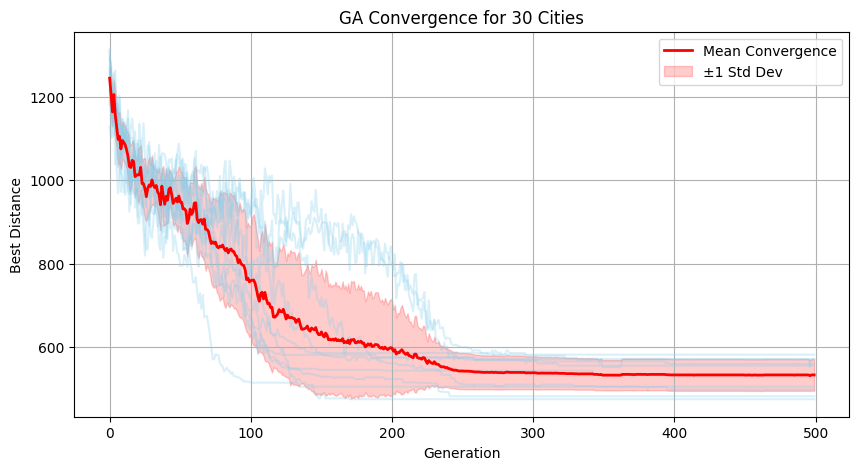

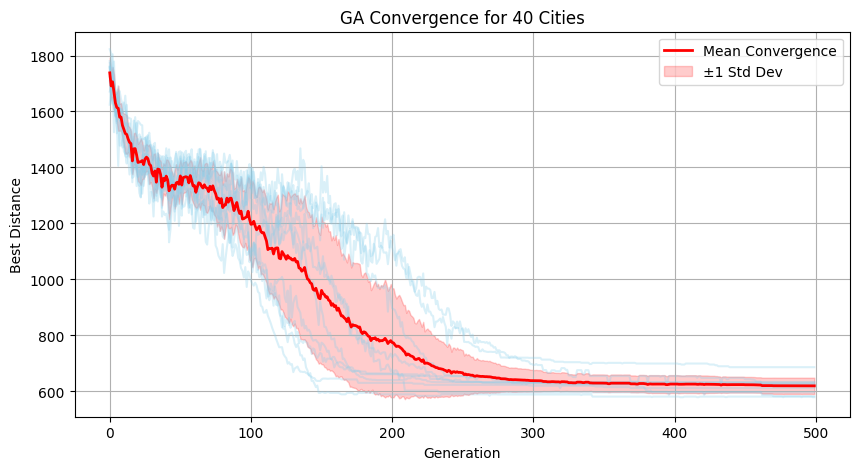

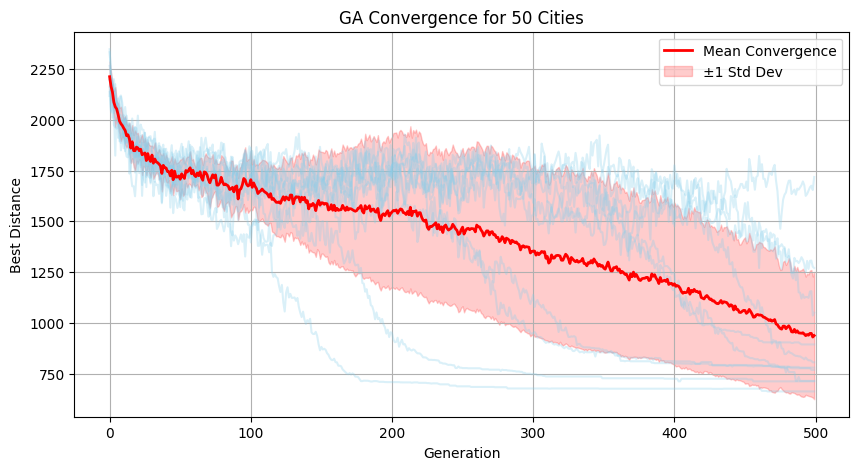

In [40]:
# =========================
# GA Parameters (tuned)
# =========================
P = 200
MUTRATE = 0.1
maxGeneration = 500
num_runs = 10  # multi-run count per city size

# =========================
# Experiment: Different City Sizes
# =========================
city_sizes = [10, 20, 30, 40, 50]
results_by_size = []

for size in city_sizes:
    coords_subset = coords[:size]
    N = size
    dist_matrix = np.sqrt(((coords_subset[:, None, :] - coords_subset[None, :, :])**2).sum(axis=2))
    
    best_distances = []
    all_bestFitness = []
    run_times = []

    for run in range(num_runs):
        # Initialize population
        population = [Individual(random.sample(range(N), N)) for _ in range(P)]
        for ind in population:
            ind.fitness = total_distance(ind, dist_matrix)

        bestFitness = []

        # Start timing this run
        start_time = time.time()

        # GA evolution
        for gen in range(maxGeneration):
            offspring = selection(population)
            offspring = crossover(offspring)
            offspring = mutation(offspring, MUTRATE=MUTRATE)
            for ind in offspring:
                ind.fitness = total_distance(ind, dist_matrix)
            population = offspring
            best = min(population, key=lambda x: x.fitness)
            bestFitness.append(best.fitness)

        # End timing this run
        end_time = time.time()
        run_time = end_time - start_time
        run_times.append(run_time)

        best_solution = min(population, key=lambda x: x.fitness)
        best_distances.append(best_solution.fitness)
        all_bestFitness.append(bestFitness)

    mean_best = np.mean(best_distances)
    std_best = np.std(best_distances)
    mean_time = np.mean(run_times)
    results_by_size.append({
        'size': size,
        'mean_distance': mean_best,
        'std_distance': std_best,
        'mean_time': mean_time,
        'all_bestFitness': all_bestFitness
    })

    print(f"\nCity Size: {size}")
    print("Mean best distance:", mean_best)
    print("Std deviation:", std_best)
    print("Best distance overall:", np.min(best_distances))
    print("Worst distance overall:", np.max(best_distances))
    print("Mean computation time per run:", mean_time, "seconds")

# =========================
# Plot results: distance vs cities
# =========================
sizes = [r['size'] for r in results_by_size]
means = [r['mean_distance'] for r in results_by_size]
stds = [r['std_distance'] for r in results_by_size]

plt.errorbar(sizes, means, yerr=stds, fmt='-o', capsize=5)
plt.xlabel("Number of cities")
plt.ylabel("Best distance (mean ± std)")
plt.title("GA Performance for Different City Sizes")
plt.grid(True)
plt.show()

# =========================
# Plot convergence for each city size (optional)
# =========================
for result in results_by_size:
    all_fitness = np.array(result['all_bestFitness'])  # shape: (num_runs, maxGeneration)
    mean_fitness = np.mean(all_fitness, axis=0)
    std_fitness = np.std(all_fitness, axis=0)

    plt.figure(figsize=(10,5))

    # Plot individual runs lightly
    for run_fitness in all_fitness:
        plt.plot(run_fitness, color='skyblue', alpha=0.3)

    # Plot mean with bold line
    plt.plot(mean_fitness, color='red', linewidth=2, label='Mean Convergence')
    plt.fill_between(range(len(mean_fitness)), mean_fitness-std_fitness, mean_fitness+std_fitness,
                     color='red', alpha=0.2, label='±1 Std Dev')

    plt.xlabel("Generation")
    plt.ylabel("Best Distance")
    plt.title(f"GA Convergence for {result['size']} Cities")
    plt.legend()
    plt.grid(True)
    plt.show()

